# Chapter 4

The following in this notebook are my notes and code from Chapter 4 of "Reinforcement Learning: An Introduction" by Sutton and Barto.

Dynamic programming (DP) refers to a set of algorithms that can be used to calculate the optimal policies, given a perfect model of the environment as a Markov decision process.

**"Classical DP algorithms are of limited utility in reinforcement learning both because of their assumption of a perfect model and because of their great computational expense, but they are still important theoretically."**

Typically, we make the assumption that our environment is a finite MDP. Dynamic programming can be applied to problems that have continuous state and action spaces, but then exact solutions are only possible in special cases. One common method of getting approximate solutions for such tasks is to quantize the state and action spaces and then use the finite-state DP algorithms. Methods explored in Part 2 can be applied to continuous problems and are an extension of that approach. 

"Key idea of dynamic programming, and of reinforcement learning generally, is the use of value functions to organize and structure the search for good policies." In this chapter we'll show how dynamic programming can compute the value functions from Chapter 3. We can obtain optimal policies once we've found the optimal value functions, $v_*$ or $q_*$, that meet the Bellman optimality equations:

$v_*(s) = max_a \mathbb{E}[R_{t+1} + \gamma v_*(S_{t+1} | S_t = s, A_t = a]$

$v_*(s) = max_a \sum_{s', r} p(s', r | s, a)[r + \gamma v_*(s') \quad (4.1) \quad$, or

$q_*(s, a) = \mathbb{E}[R_{t+1} + \gamma max_{a'} q_*(S_{t+1}, a') | S_t = s, A_t = a]$

$q_*(s, a) = \sum_{s', r} p(s', r | s, a) [r + \gamma max_{a'} q_*(s', a')] \quad (4.2) \quad$

$\forall \quad s \in S, \space a \in A(s), \space s' \in S^+$

Dynamic programming algorithms are formed by turning these into update rules for improving the approximations of the value functions.

### 4.1 Policy Evaluation (Prediction)

Policy evaluation is how we compute the state-value function $v_\pi$ for a policy $\pi$. It is also referred to as the prediction problem. Recall from ch. 3, $\forall \quad s \in S$,

$v_\pi(s) \stackrel{.}{=} \mathbb{E}_\pi [G_t | S_t = s]$

$v_\pi(s) = \mathbb{E} [R_{t+1} + \gamma G_{t+1} | S_t = s] \quad \quad$ (from (3.9))

$v_\pi(s) = \mathbb{E} [R_{t+1} + \gamma v_\pi(S_{t+1}) | S_t = s] \quad \quad (4.3)$

$v_\pi(s) = \sum_a \pi(a | s) \sum_{s', r} p(s', r | s, a)[r + \gamma v_k(s')] \quad (4.4)$,

$\pi (a | s)$ is the probability of taking an action $a$ in state $s$ under policy $\pi$. The expected returns and values are subscripted by $\pi$ to indicate that they're conditional on $\pi$ being followed. 'The existence and uniqueness of $v_\pi$ are guaranteed as long as either $\gamma < 1$ or eventual termination is guaranteed from all states under the policy $\pi$.

When environment dynamics are all completely known, 4.4 is a system of $|S|$ linear equations in $|S|$ unknowns. The unknowns are the values of each state $s \in S$. Here, an iterative solution method is best to compute the solutions to the linear system. We arbitrarily choose our initial value approximation, and each subsequent approximation is obtained by using the Bellman equation for $v_\pi (4.4)$ as an update rule.

$v{k+1}(s) \stackrel{.}{=} \mathbb{E}_\pi[R_{t+1} + \gamma v_k (S_{t+1}) | S_t = s]$

$v{k+1}(s) = \sum_{a} \pi(a|s) \sum_{s', r} p(s', r | s, a)[r + \gamma v_k(s')] \quad (4.5)$

$\forall \quad s \in S$

$v_k = v_\pi$ is fixed point for this update rule since the Bellman equation guarantees equality in this case. The sequence of ${v_k}$ can be shown to converge to $v_\pi$ as $k \rightarrow \infty$. This is under the same conditions that guarantee us the existence of $v_\pi$. This algorithm is named *iterative policy evaluation*.

Iterative policy evaluation applies the same operation to each state: replaces the old value of state $s$ with new value, obtained from the old values and from the expected immediate reward along all the possible one-step transitions under the policy that is being evaluated. This operation is called an expected update. "Each iteration of iterative policy evaluation updates the value of every state once to produce the new approximate value function $v_{k+1}$." The kind of expected updates depends on whether we are updating a state or state-action pair, and depends on the way that the estimated values of the later states are combined. Every update done in a dynamic programming algorithm is an expected update because we are updating the values based on an expectation over all possible next states rather than on a sampled next state. 

To code a sequential program for iterative policy evaluation like in (4.5), will need to use two arrays. One array for the values before the latest update ${v_k(s)}$, and one for the values after the latest update ${v_{k+1}(s)}$. Doing it this way, we can compute the new values one at a time from the old values without the old values being manipulated. Or, we can use one array and update the values in place. Doing that, depending on the order that the states are updated, new values might be used instead of old ones on the RHS of equation (4.5). The in-place version of the algorithm will also converge to $v_\pi$. It often will converge faster than the two-array version of the algorithm, because new values are used as soon as they are available. In the in-place version of the algorithm, the order in which states have their values updated during the "sweep" (sweep is one iteration of updates through all states) has a large impact on the rate of convergence. 

Pseudocode from the book for iterative policy evaluation for estimating $V \approx v_\pi$

Input is our policy to be evaluated, $\pi$, a threshold parameter for convergence (as in iterative methods like successive over relaxation or Gauss-Seidel), and an initial guess for $V(s)$, for all $s \in S^+$ except for $V(terminal) = 0$.

Loop 1:

$\delta \leftarrow 0$
    
Loop over each $s\in S$:
    
$v \leftarrow V(S)$
        
$V(s) \leftarrow \sum_{a} \pi(a|s) \sum_{s', r} p(s', r | s, a)[r + \gamma V(s')]$
        
$\delta \leftarrow max(\delta, |v - V(s)|)$
        
until $\delta < \space$ tolerance

**Example 4.1** 4 x 4 gridworld

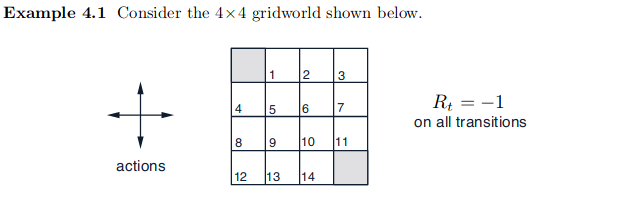

In [9]:
from IPython.display import Image
Image(filename="/home/jfp15b/Documents/senior-practicum/BookNotes/Screenshot from 2019-03-13 19-19-27.png")

Nonterminal states are all not grey states, so $S = {1, 2, \dots, 14}$. Each state has four possible actions, $A = {up, down, left, right}$. The actions deterministically cause the corresponding state transitions. Except for the fact that actions that would take the agent off of the grid instead leave the state unchanged. This task is not discounted and it is episodic. All transitions have a reward of -1 until we reach the terminal state. Even though the terminal state is shown in two places, it is actually one state. Our expected reward function is $r(s, a, s') = -1 \forall \quad$ states $s, s'$ and actions. If the agent follows the equiprobable random policy, then the left side of Figure 4.1 shows the sequence of the value functions ${v_k}$ computed by iterative policy evaluation. The final estimate ends up being $v_\pi$. 

## 4.2 Policy Improvement